In [7]:
#  Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Load Dataset
df = pd.read_excel("INX_Employee_Performance.xlsx")  # <-- Change file name if needed

#  Preview
df.head()


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


# 1️⃣ Department-wise Average Performance


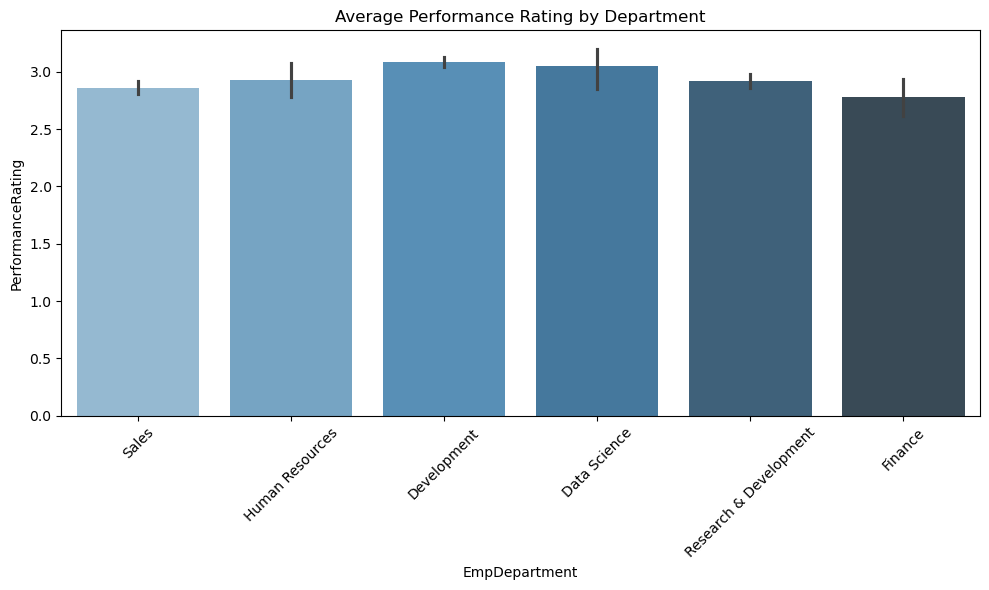

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='EmpDepartment', y='PerformanceRating', estimator='mean', 
            hue='EmpDepartment', palette='Blues_d', legend=False)
plt.title("Average Performance Rating by Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2️⃣ Correlation Heatmap of Key Features

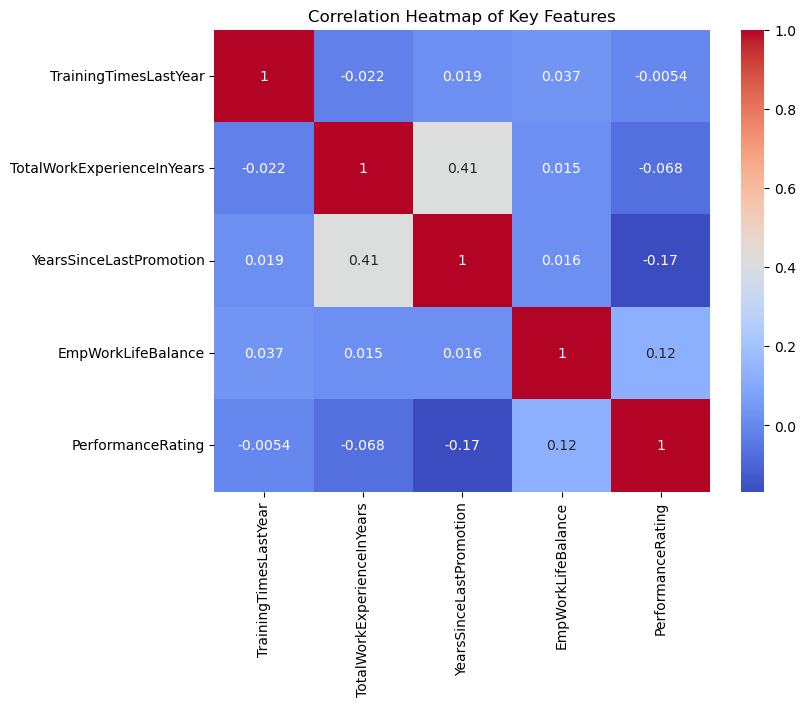

In [13]:
plt.figure(figsize=(8,6))
features = ['TrainingTimesLastYear', 'TotalWorkExperienceInYears', 'YearsSinceLastPromotion', 'EmpWorkLifeBalance', 'PerformanceRating']
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Key Features")
plt.show()

# 3️⃣ Box Plot: Training Score vs Performance Rating

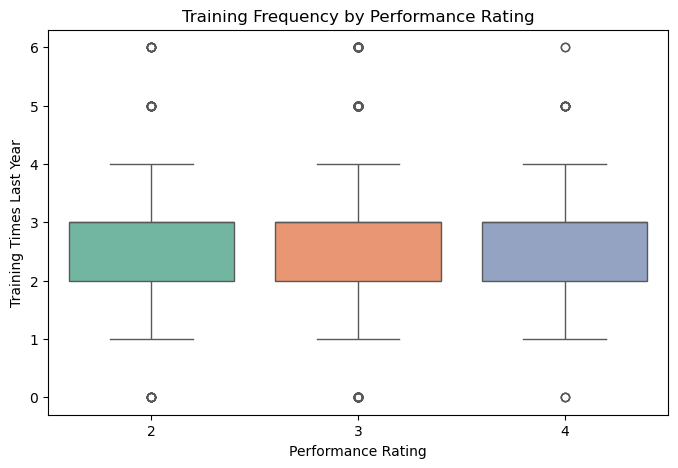

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='PerformanceRating', y='TrainingTimesLastYear', 
            hue='PerformanceRating', palette='Set2', legend=False)
plt.title("Training Frequency by Performance Rating")
plt.xlabel("Performance Rating")
plt.ylabel("Training Times Last Year")
plt.show()


# 4️⃣ Work-Life Balance Distribution by Department

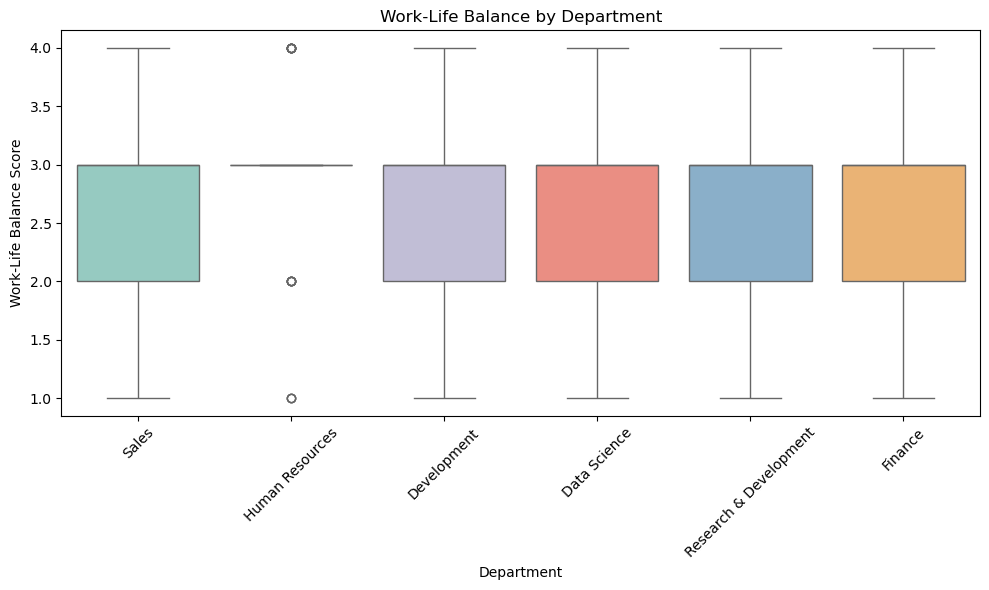

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, 
            x='EmpDepartment', 
            y='EmpWorkLifeBalance', 
            hue='EmpDepartment', 
            palette='Set3', 
            legend=False)
plt.title("Work-Life Balance by Department")
plt.xlabel("Department")
plt.ylabel("Work-Life Balance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# 5️⃣ EmpWorkLifeBalance vs Performance (Count Plot)

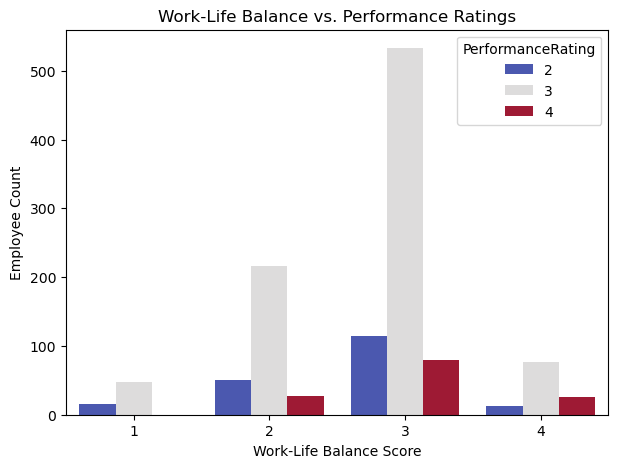

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='EmpWorkLifeBalance', hue='PerformanceRating', palette='coolwarm')
plt.title("Work-Life Balance vs. Performance Ratings")
plt.xlabel("Work-Life Balance Score")
plt.ylabel("Employee Count")
plt.show()


# 6️⃣ Feature Importance from Random Forest (after model training)

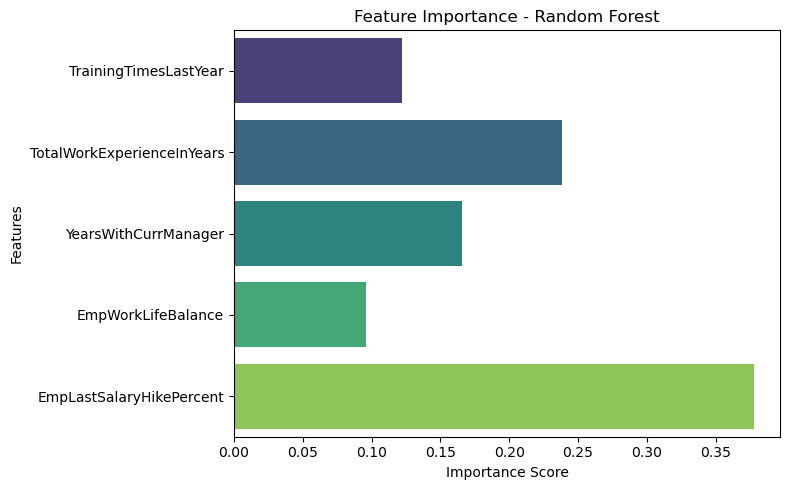

In [36]:
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, hue=features, palette='viridis', legend=False)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
